<a href="https://colab.research.google.com/github/aishwaryaishu009/CNN-classifying-images/blob/main/CNN_classifying_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***MODEL 1***

Classifying Images using CNN

In [ ]:
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the path to your dataset
dataset_path = '/content/drive/MyDrive/archive (25)'

# List files in the dataset folder
files = os.listdir(dataset_path)
print(files)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['train', 'test', 'val']


In [ ]:
import os
import itertools

import cv2
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import missingno as msno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping, LearningRateScheduler
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7
from tensorflow.keras.applications import Xception

In [ ]:

def create_dataframe(folder_path):
    data = {'image_path': [], 'labels': []}

    for class_folder in os.listdir(folder_path):
        class_folder_path = os.path.join(folder_path, class_folder)

        if os.path.isdir(class_folder_path):

            for image_file in os.listdir(class_folder_path):
                image_path = os.path.join(class_folder_path, image_file)

                labels = class_folder

                data['image_path'].append(image_path)
                data['labels'].append(labels)


    df = pd.DataFrame(data)
    return df

In [ ]:

def create_dataframe(folder_path):
    data = {'image_path': [], 'labels': []}

    for class_folder in os.listdir(folder_path):
        class_folder_path = os.path.join(folder_path, class_folder)

        if os.path.isdir(class_folder_path):

            for image_file in os.listdir(class_folder_path):
                image_path = os.path.join(class_folder_path, image_file)

                labels = class_folder

                data['image_path'].append(image_path)
                data['labels'].append(labels)


    df = pd.DataFrame(data)
    return df


# Define the path to your dataset
dataset_path = '/content/drive/MyDrive/archive (25)'


train_df = create_dataframe(os.path.join(dataset_path, 'train'))
test_df = create_dataframe(os.path.join(dataset_path, 'test'))
valid_df = create_dataframe(os.path.join(dataset_path, 'val'))


In [ ]:
all_df = pd.concat([train_df, test_df, valid_df], ignore_index=True)

In [ ]:
all_df

,image_path,labels
0,/content/drive/MyDrive/archive (25)/train/pepe...,peperchili
1,/content/drive/MyDrive/archive (25)/train/pepe...,peperchili
2,/content/drive/MyDrive/archive (25)/train/pepe...,peperchili
3,/content/drive/MyDrive/archive (25)/train/pepe...,peperchili
4,/content/drive/MyDrive/archive (25)/train/pepe...,peperchili
...,...,...
30075,/content/drive/MyDrive/archive (25)/val/curcum...,curcuma
30076,/content/drive/MyDrive/archive (25)/val/curcum...,curcuma
30077,/content/drive/MyDrive/archive (25)/val/curcum...,curcuma
30078,/content/drive/MyDrive/archive (25)/val/curcum...,curcuma


In [ ]:
ds_name = 'Plant Classification'

In [ ]:
def num_of_examples(dataset, name='dataset'):
    print(f"The {name} dataset has {dataset.shape[0]} examples.")

num_of_examples(all_df, ds_name)


The Plant Classification dataset has 30080 examples.


In [ ]:

def num_of_classes(dataset, name='dataset'):
    print(f"The {name} dataset has {len(dataset['labels'].unique())} classes.")

num_of_classes(all_df, ds_name)


The Plant Classification dataset has 30 classes.


In [ ]:
def classes_count(all_df, name='df'):

    print(f"In the {name} dataset:")
    print("=" * 70)
    print()

    for class_name in all_df['labels'].unique():
        num_class = len(all_df['labels'][all_df['labels'] == class_name])
        print(f"The class '{class_name}' has {num_class} images.")
        print('-' * 70)

classes_count(all_df, ds_name)

In the Plant Classification dataset:

The class 'peperchili' has 1000 images.
----------------------------------------------------------------------
The class 'watermelon' has 1000 images.
----------------------------------------------------------------------
The class 'waterapple' has 1000 images.
----------------------------------------------------------------------
The class 'tobacco' has 1010 images.
----------------------------------------------------------------------
The class 'pomelo' has 1010 images.
----------------------------------------------------------------------
The class 'sweetpotatoes' has 1020 images.
----------------------------------------------------------------------
The class 'pineapple' has 1020 images.
----------------------------------------------------------------------
The class 'spinach' has 1000 images.
----------------------------------------------------------------------
The class 'shallot' has 1000 images.
---------------------------------------------

In [ ]:
def cat_summary_with_graph(dataframe, col_name):
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
              '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
              '#1a1a1a', '#ff69b4', '#ffd700', '#008000', '#4b0082',
              '#e6e6fa', '#ff4500', '#8b4513', '#00ced1', '#dda0dd',
              '#bdb76b', '#7fffd4', '#8a2be2', '#ff8c00', '#9932cc',
              '#ff1493', '#00fa9a', '#8b0000', '#008b8b', '#483d8b']

    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Yüzde Grafiği'),
                        specs=[[{"type": "bar"}, {'type': 'pie'}]])

    fig.add_trace(go.Bar(y=dataframe[col_name].value_counts().values.tolist(),
                         x=[str(i) for i in dataframe[col_name].value_counts().index],
                         text=dataframe[col_name].value_counts().values.tolist(),
                         textfont=dict(size=20),
                         name=col_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=colors)),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=dataframe[col_name].value_counts().keys(),
                         values=dataframe[col_name].value_counts().values,
                         textfont=dict(size=20),
                         textposition='auto',
                         showlegend=False,
                         name=col_name,
                         marker=dict(colors=colors)),
                  row=1, col=2)

    fig.update_layout(title={'text': col_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)

cat_summary_with_graph(all_df, 'labels')


In [ ]:
batch_size = 40
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Calculate batch size for the test set dynamically based on its length
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length % n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

# Define a simple preprocessing function (identity function in this case)
def scalar(img):
    return img

# Create image data generators for training, validation, and testing
tr_gen = ImageDataGenerator(preprocessing_function=scalar)
ts_gen = ImageDataGenerator(preprocessing_function=scalar)

# Training data generator
train_gen = tr_gen.flow_from_dataframe(train_df,
                                       x_col='image_path',
                                       y_col='labels',
                                       target_size=img_size,
                                       class_mode='categorical',
                                       color_mode='rgb',
                                       shuffle=True,
                                       batch_size=batch_size)

# Validation data generator
valid_gen = ts_gen.flow_from_dataframe(valid_df,
                                       x_col='image_path',
                                       y_col='labels',
                                       target_size=img_size,
                                       class_mode='categorical',
                                       color_mode='rgb',
                                       shuffle=True,
                                       batch_size=batch_size)

# Test data generator
test_gen = ts_gen.flow_from_dataframe(test_df,
                                      x_col='image_path',
                                      y_col='labels',
                                      target_size=img_size,
                                      class_mode='categorical',
                                      color_mode='rgb',
                                      shuffle=False,
                                      batch_size=test_batch_size)


Found 21080 validated image filenames belonging to 30 classes.
Found 3000 validated image filenames belonging to 30 classes.
Found 6000 validated image filenames belonging to 30 classes.


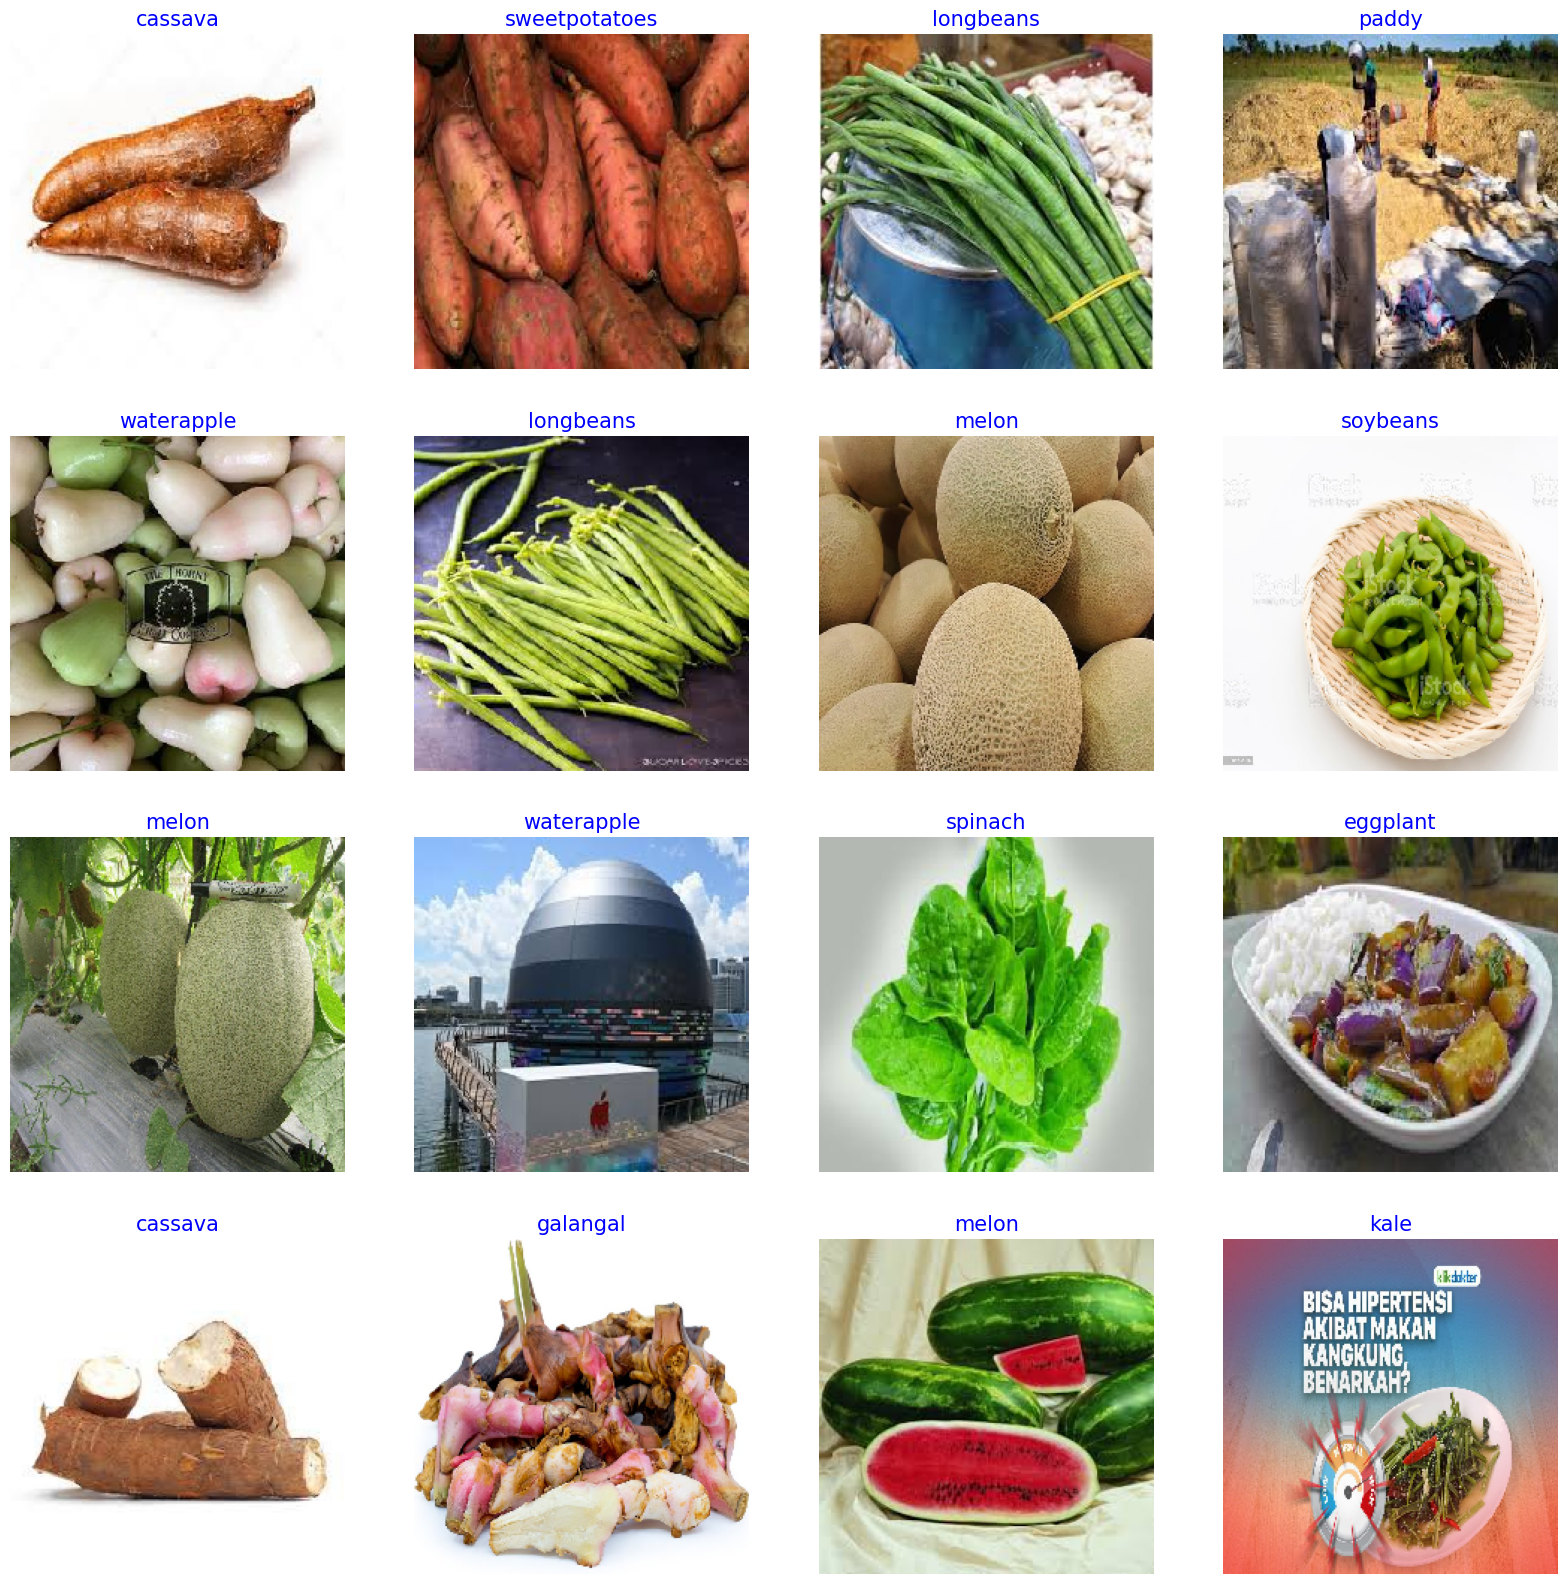

In [ ]:
# Create a dictionary containing class indices for the training data generator.
g_dict = train_gen.class_indices

# Create a list of class names.
classes = list(g_dict.keys())

# Retrieve a batch of examples from the training data generator.
images, labels = next(train_gen)

# Create a 20x20 drawing figure.
plt.figure(figsize=(20, 20))

# Start a loop for 16 examples.
for i in range(16):

    # Create a subplot with a 4x4 grid.
    plt.subplot(4, 4, i + 1)

    # Normalize the image as an array with values between 0 and 255.
    image = images[i] / 255

    # Display the normalized image in the subplot.
    plt.imshow(image)

    # Find the index of the largest value in the label array (corresponding to 1).
    index = np.argmax(labels[i])

    # Get the class name corresponding to the index.
    class_name = classes[index]

    # Set the title of the subplot to the class name, displayed in blue.
    plt.title(class_name, color='blue', fontsize=15)

    # Turn off axes, meaning coordinate axes are not displayed in the subplot.
    plt.axis('off')

# Display the overall figure containing all the subplots.
plt.show()


In [ ]:
# Input image dimensions
img_size = (224, 224)

# Number of image channels (3 for RGB)
channels = 3

# Input image shape
img_shape = (img_size[0], img_size[1], channels)

# Number of classes determined by the class count of the training data generator
class_count = len(list(train_gen.class_indices.keys()))

# Configure the EfficientNetB7 model without downloading weights
base_model = tf.keras.applications.efficientnet.EfficientNetB7(
    include_top=False, weights=None, input_shape=img_shape, pooling='max'
)

# Freeze the weights of the pre-trained model
base_model.trainable = False

# Create a new model
model = Sequential([
    base_model,  # Pre-trained model
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),  # Batch normalization layer
    Dense(
        128,
        kernel_regularizer=regularizers.l2(l=0.016),
        activity_regularizer=regularizers.l1(0.006),
        bias_regularizer=regularizers.l1(0.006),
        activation='relu'
    ),  # Dense layer
    Dropout(rate=0.3, seed=123),   # Dropout layer
    Dense(class_count, activation='softmax')  # Output layer
])

# Compile the model
model.compile(Adamax(learning_rate=0.002), loss='categorical_crossentropy', metrics=['accuracy'])

# Display a summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional  (None, 2560)              64097687  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 2560)              10240     
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 128)               327808    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 30)                3870      
                                                                 
Total params: 64439605 (245.82 MB)
Trainable params: 336

In [ ]:
from keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Quantity to be monitored for improvement
    patience=5,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored quantity
    mode='min',           # 'min' means training will stop when the quantity monitored has stopped decreasing
)

In [ ]:
batch_size = 64  # Set batch size for training
epochs = 1     # Total number of epochs in training

history = model.fit(x=train_gen,
                    epochs=epochs,
                    verbose=1,
                    validation_data=valid_gen,
                    validation_steps=None,
                    shuffle=False,
                    batch_size=batch_size,
                    callbacks=[early_stopping])

Epoch 1/30
527/527 [==============================] - 2674s 5s/step - loss: 3.4074 - accuracy: 0.0310 - val_loss: 3.4023 - val_accuracy: 0.0460
Epoch 2/30
527/527 [==============================] - 278s 528ms/step - loss: 3.4027 - accuracy: 0.0375 - val_loss: 3.4033 - val_accuracy: 0.0450
Epoch 3/30
319/527 [=================>............] - ETA: 1:35 - loss: 3.4030 - accuracy: 0.0402

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
import matplotlib.pyplot as plt
import numpy as np

def predict_and_display(image_path, model, class_labels):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_index]

    # Display the image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted Class: {predicted_class_label}")
    plt.show()

# Load the pre-trained model
# Note: Make sure to replace 'your_model_path.h5' with the actual path to your model file.
model.load_weights('/content/drive/MyDrive/archive (25)/train/coconut/coconut0.jpg')

# Define class labels
class_labels = list(train_gen.class_indices.keys())

# Path to the image you want to test
image_path_to_test = '/content/drive/MyDrive/archive (25)/train/coconut/coconut0.jpg'

# Make prediction and display the result
predict_and_display(image_path_to_test, model, class_labels)


In [ ]:
# Compute steps for training, validation, and test sets
train_steps = len(train_gen)
valid_steps = len(valid_gen)
test_steps = len(test_gen)

# Evaluate the model on the training set
train_score = model.evaluate(train_gen, steps=train_steps, verbose=1)

# Evaluate the model on the validation set
valid_score = model.evaluate(valid_gen, steps=valid_steps, verbose=1)

# Evaluate the model on the test set
test_score = model.evaluate(test_gen, steps=test_steps, verbose=1)

# Print the evaluation results
print("Training Loss: ", train_score[0])
print("Training Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])


In [ ]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_true, y_pred_labels, target_names=classes))
